In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import gym
import gym_minigrid
import gym_minipacman

In [2]:
from hydra.experimental import compose, initialize
initialize(
    config_path="../configs",
)

In [3]:
import rl_trickery.envs
import rl_trickery.utils.utils as utils
from rl_trickery.utils.logger import Logger
from rl_trickery.utils.video import VideoRecorder
from rl_trickery.envs import make_envs

In [4]:
cfg = compose("simple")
print(cfg.pretty())

num_timesteps: 10000000.0
device: cuda:0
seed: 0
num_envs: ${agent.num_envs}
model_params_count: ???
name: any
log_timestep_interval: 1000.0
log_save_tb: true
save_video: true
eval_timestep_interval: 50000.0
num_eval_episodes: 32
env:
  env_id: RegularMiniPacmanNoFrameskip-v0
  env_kwargs: {}
  obs_type: image
  image_size:
  - 15
  - 19
  to_grayscale: false
  episode_life: false
  reward_rescale: true
  clip_rewards: false
  cognitive_pause: 1337
  frame_stack: 1
  frame_skip: 1
  random_initial_steps: 0
  pytorch_dim_order: true
  device: ${device}
agent:
  name: a2c
  num_envs: 16
  num_steps: 10
  device: ${device}
  network_params:
    architecture: crnn
    state_channels: 64
    hidden_size: 512
    random_cog_fraction: 0.0
    fixed_recursive_depth: 3
    append_a_cog: false
    append_coords: false
    pool_and_inject: false
  algo_params:
    twoAM: false
    lr: 0.0007
    gamma: 0.99
    value_loss_coef: 0.5
    entropy_coef: 0.01
    eps: 1.0e-05
    alpha: 0.99
    max_g

In [26]:
env = make_envs(
    **cfg.env,
    seed=1,
    num_envs=1,
)

In [27]:
env.observation_space.__class__.__name__

'Box'

In [28]:
env.observation_space.shape

(3, 15, 19)

In [29]:
s = env.reset()

In [30]:
s, _, _, _ = env.step(torch.tensor([[0]]))

In [31]:
s.max()

tensor(255, device='cuda:0', dtype=torch.uint8)

In [32]:
s[0, 0]

tensor([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255],
        [255,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         255,   0,   0,   0, 255],
        [255,   0, 255,   0, 255,   0, 255, 255, 255, 255, 255, 255, 255,   0,
         255,   0, 255,   0, 255],
        [255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0, 255],
        [255,   0, 255,   0, 255,   0, 255, 255, 255, 255, 255, 255, 255,   0,
         255,   0, 255,   0, 255],
        [255,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0, 255,   0, 255],
        [255,   0, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255,   0, 255,
         255, 255, 255,   0, 255],
        [255,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,
           0,   0,   0,   0, 255],
        [255,   0, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255,   0, 255,
         

In [33]:
s[0].cpu().numpy().transpose(1, 2, 0)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [  0,   0, 25

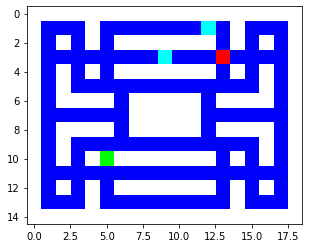

In [34]:
s = env.reset()
plt.imshow(s[0].cpu().numpy().transpose(1, 2, 0))


In [35]:
s.shape

torch.Size([1, 3, 15, 19])

In [15]:
a = torch.LongTensor([0, 2, 5])
b = torch.zeros((3, 6))
b[range(a.size(0)), a] = 1

In [16]:
b

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.]])

In [14]:
env = gym.make("MiniGrid-Dynamic-Obstacles-16x16-v0")

In [16]:
img = env.reset()["image"]

In [22]:
img/img.max()

array([[[0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ]],

       [[0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ]],

       [[0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ],
        [0.33333333, 0.83333333, 0.        ]],

       [[0.16666667, 0.     

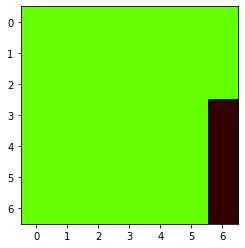

In [42]:
plt.imshow(img/img.max())


In [40]:
img, _, _, _ = env.step(env.action_space.sample())
img = img["image"]

In [6]:
env.render("rgb_array").shape

(192, 192, 3)

In [19]:
b.shape

torch.Size([3, 6])

In [20]:
b

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.]])

## Generate fixed mazes

In [21]:
import numpy as np

In [22]:
from rl_trickery.envs.maze import Maze

In [23]:
goal = np.unravel_index(np.argmin(m.board, axis=None), m.board.shape)

NameError: name 'm' is not defined

In [ ]:
np.atleast_2d(goal)

In [ ]:
%cd ../rl_trickery/envs/

In [ ]:
for k in range(4, 65):
    m  = Maze("maze", k)
    np.save("raw_maze_{}".format(k), m.board)

In [ ]:
xxxx

In [ ]:
import pkg_resources

In [ ]:
np.load(pkg_resources.resource_filename("rl_trickery", "envs/mazes/raw_maze_12.npy"))